In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

In [20]:
# 加载数据集
file_path = r'F:\机械学习\实验3\train.csv'
data = pd.read_csv(file_path)

In [21]:
# 显示数据集的前几行
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# 查看缺失值
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

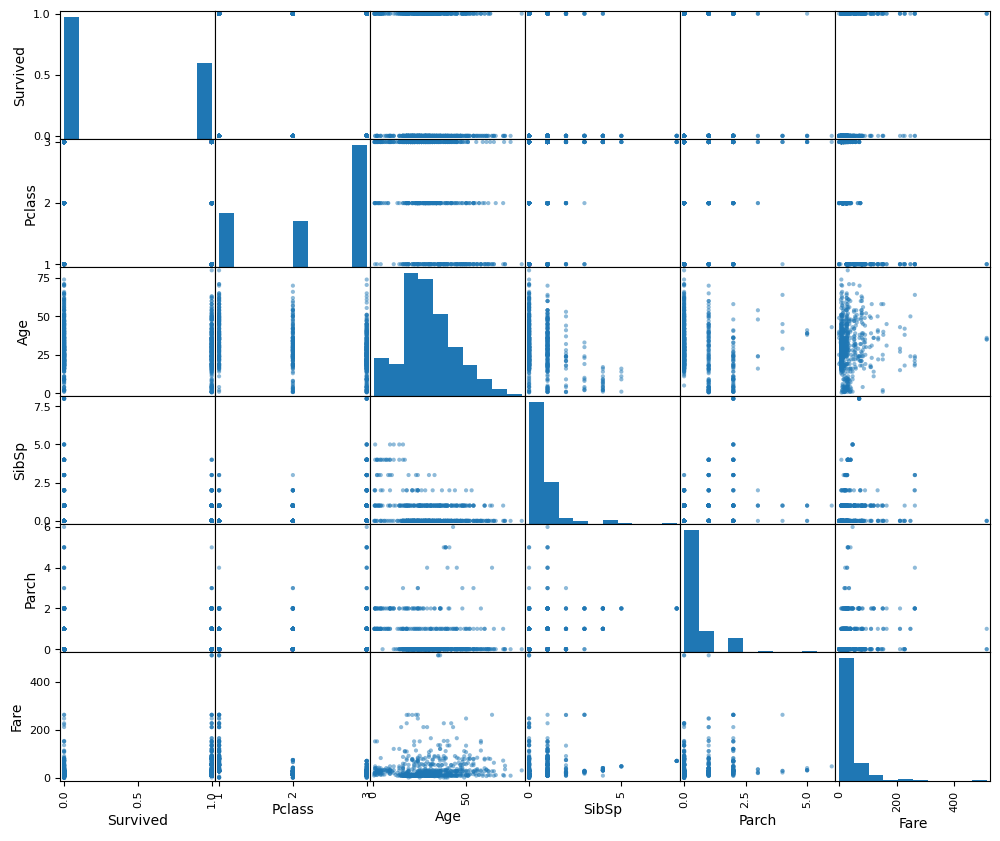

In [24]:
# 查看散点图矩阵
scatter_matrix(data.iloc[:,1:],figsize=(12,10))
plt.show()

In [25]:
# 离散变量转码
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0, np.where(data["Embarked"]=="C",1, np.where(data["Embarked"]=="Q",2,3)))
col_name = ["Survived","Pclass","Sex_cleaned","Age","SibSp","Parch","Fare","Embarked_cleaned"]

In [26]:
# 去掉缺失值
data=data[col_name].dropna(axis=0, how='any')
data.head()

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [27]:
# 将数据集拆分为特征和目标变量
X = data.loc[:,data.columns!='Survived']
y = data.loc[:,data.columns=='Survived']

In [28]:
# 将数据集分成训练集和测试集
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,random_state=2)
X_tr.shape,X_ts.shape

((535, 7), (179, 7))

In [29]:
# 建立模型
from sklearn.naive_bayes import GaussianNB

In [30]:
# Naive Bayes 分类器
gnb = GaussianNB()
gnb.fit(X_tr,y_tr.values.ravel())

GaussianNB()

In [31]:
# 预测测试集结果
y_pred = gnb.predict(X_ts)

In [32]:
# 计算f1-score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
f1_score(y_ts,y_pred)

0.7368421052631577

In [33]:
# 计算5折交叉验证
scores = cross_val_score(gnb,X,y.values.ravel(),cv=5,scoring='f1')
print('5 fold cross validation f1-score: %.4f'%scores.mean())

5 fold cross validation f1-score: 0.7255


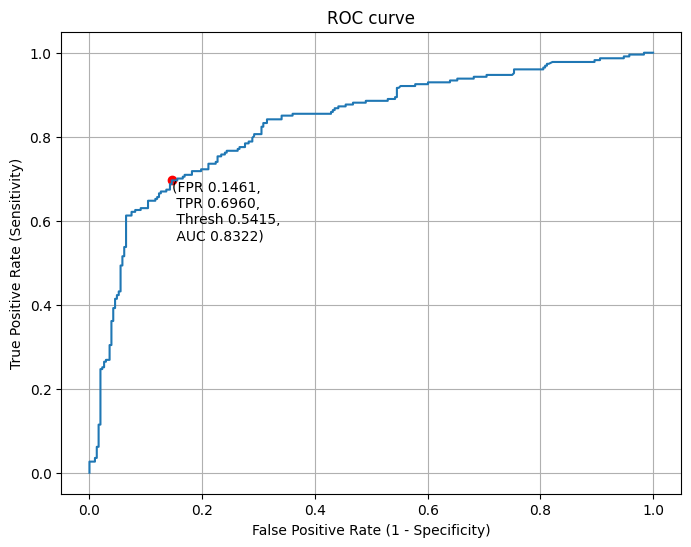

In [34]:
# 绘制ROC曲线，并计算概率阈值
y_tr_pred_prob = gnb.predict_proba(X_tr)
y_tr_pred_prob = [y for x,y in y_tr_pred_prob]
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresh = roc_curve(y_tr, y_tr_pred_prob)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
idx = np.argmax(tpr-fpr)
Thresh = thresh[idx]
myAUC = roc_auc_score(y_tr, y_tr_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.scatter(fpr[idx],tpr[idx],c='r')
plt.text(fpr[idx],tpr[idx],'(FPR %.4f,\n TPR %.4f,\n Thresh %.4f,\n AUC %.4f)'%(fpr[idx],tpr[idx],Thresh,myAUC),va='top')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [35]:
# 使用阈值重新预测存活
y_ts_pred_prob = gnb.predict_proba(X_ts)
y_ts_pred = (y_ts_pred_prob[:,1]>Thresh) *1
y_ts_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [36]:
# 计算测试集ROC阈值预测结果f1-score
f1_score(y_ts,y_ts_pred)

0.7328244274809159